In [1]:
import pandas as pd
import pylab as pl
import numpy as np

In [ ]:
tng_photo  = pd.read_csv('./data/tng_features.csv').drop(['Unnamed: 0'], axis=1)
sdss_photo = pd.read_csv('./data/stellar_phot.csv').drop(['Unnamed: 0'], axis=1)
tweb_df = pd.read_csv('./data/tweb_cw_grid64_rcellsize.csv').drop(['Unnamed: 0'], axis=1)

In [7]:
print(len(tng_photo), len(sdss_photo), len(tweb_df))
print(tng_photo.keys(), sdss_photo.keys(), tweb_df.keys())

4527127 8839 4527127
Index(['ID', 'pos_x', 'pos_y', 'pos_z', 'vel_x', 'vel_y', 'vel_z', 'spin_x',
       'spin_y', 'spin_z', 'tng_U', 'tng_B', 'tng_V', 'tng_K', 'tng_g',
       'tng_r', 'tng_i', 'tng_z'],
      dtype='object') Index(['ID', 'Mu', 'Mg', 'Mr', 'Mi', 'Mz', 'GALAXY_CLASS'], dtype='object') Index(['ID', 'lambda1', 'lambda2', 'lambda3', 'delta', 'Environment'], dtype='object')


In [17]:
df = pd.merge(tng_photo, sdss_photo, on='ID')
df = pd.merge(df, tweb_df, on='ID')
df

,ID,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,spin_x,spin_y,spin_z,...,Mg,Mr,Mi,Mz,GALAXY_CLASS,lambda1,lambda2,lambda3,delta,Environment
0,16.0,19125.720703,47394.566406,48635.832031,541.320618,561.414307,1058.459473,919.802063,443.820862,-776.151184,...,-19.562035,-20.320356,-20.702591,-21.029406,1.0,13.139160,18.516842,24.937453,212.680636,0.0
1,23.0,20397.841797,45979.246094,49077.042969,59.178749,585.860718,110.013954,-142.984818,45.795593,350.505188,...,-20.107349,-20.888083,-21.279430,-21.618624,1.0,5.275525,16.495362,20.279291,104.675465,0.0
2,33.0,19613.876953,47934.929688,48606.332031,717.837708,537.846985,152.025833,-311.213623,30.152905,325.945496,...,-20.105627,-20.840034,-21.210075,-21.523411,1.0,13.139160,18.516842,24.937453,212.680636,0.0
3,34.0,20591.041016,48813.570312,49379.171875,-417.767365,-550.601440,-1267.043579,-1171.334106,1325.181274,49.606903,...,-19.624805,-20.013533,-20.268049,-20.510611,0.0,8.999490,12.721573,18.044490,69.916251,0.0
4,36.0,21316.582031,49556.957031,48431.960938,-353.517792,-931.657532,598.382324,207.672119,43.486103,428.142212,...,-19.972075,-20.425173,-20.698471,-20.948126,0.0,-2.624268,9.923010,14.778152,31.149943,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8834,627848.0,3344.892822,15209.881836,24790.125000,-71.276878,461.468414,-276.078217,12.535450,-14.531941,70.221237,...,-18.391932,-19.102192,-19.469898,-19.776335,1.0,-1.595894,2.671189,5.935596,15.401130,1.0
8835,630142.0,39434.152344,21393.212891,48314.460938,-250.663101,15.798397,-184.611572,-79.806190,10.890921,-23.562563,...,-18.627331,-19.358295,-19.734182,-20.049162,1.0,2.783369,4.166851,6.297927,38.698190,0.0
8836,631897.0,17889.669922,44836.140625,31555.158203,-119.190475,-337.400757,318.643066,-38.915981,51.357212,147.958755,...,-18.575975,-19.170778,-19.492334,-19.763798,0.0,-0.142741,2.207769,3.943674,13.537366,1.0
8837,640342.0,67896.421875,60565.511719,53740.058594,38.792587,41.974781,53.348812,5.266845,17.806105,-29.060909,...,-18.609432,-19.334690,-19.701168,-20.003542,1.0,5.069341,7.819947,10.452431,44.569050,0.0


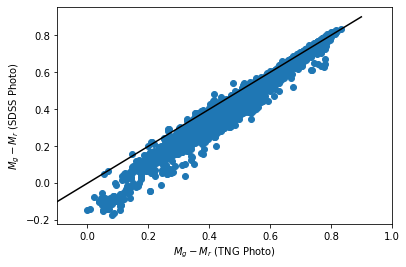

In [26]:
pl.scatter( df['Mg']-df['Mr'], df['tng_g']-df['tng_r'] )
pl.plot(np.arange(-0.1,1,0.1),np.arange(-0.1,1,0.1), c='k')
pl.xlim(-0.1,1)
pl.xlabel(r'$M_g-M_r$ (TNG Photo)')
pl.ylabel(r'$M_g-M_r$ (SDSS Photo)')
pl.show()

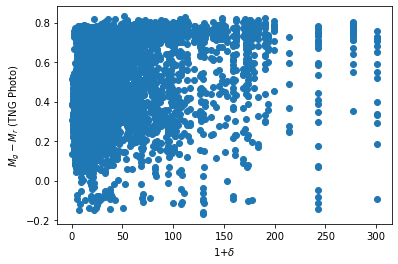

In [22]:
pl.scatter(1+df['delta'], df['tng_g']-df['tng_r'] )
pl.xlabel(r'1+$\delta$')
pl.ylabel(r'$M_g-M_r$ (TNG Photo)')
pl.show()

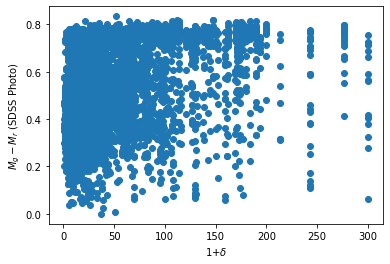

In [27]:
pl.scatter(1+df['delta'], df['Mg']-df['Mr'] )
pl.xlabel(r'1+$\delta$')
pl.ylabel(r'$M_g-M_r$ (SDSS Photo)')
pl.show()